# BMIM-BF4 MDSuite Analysis

This is a short notebook on the analysis of a 1500 atom bmim-bf4 ionic liquid system. It serves to demonstrate some of the functionality of mdsuite as applied to a single simulation.

In [1]:
import mdsuite as mds
from mdsuite.transformations.map_molecules import MolecularMap
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>

###  Instantiate the experiment and add some simulation data.

In [2]:
start = time.time()
filename = '/data/stovey/bmim_classical/nvtdump.lammpstrj'
bmim_bf4 = mds.Experiment(analysis_name='bmim_bf4',
                          time_step=0.1,
                          temperature=300.0,
                          units='real',
                          cluster_mode=False,
                         storage_path='/data/stovey/bmim_classical/')
bmim_bf4.add_data(trajectory_file=filename)

This experiment already exists! I'll load it up now.
2021-04-14 18:17:56,387 - mdsuite.experiment.experiment (INFO) - Created logfile 2021-04-14T18-17-56.log in experiment path /data/stovey/bmim_classical/bmim_bf4/logfiles


In [3]:
bmim_bf4.summarise()  # We can summerize the system if we forgot what was in it.

MDSuite bmim_bf4 Summary


Name: bmim_bf4

Temperature: 300.0 K

Number of Configurations: 100001

Number of Atoms: 1500

Species Summary

---------------

Atomic Species

***************

N: 100

C: 400

H: 750

B: 50

F: 200

Molecule Species

*****************

bmim: 50

bf4: 50

Database Information

---------------

Database Path: /data/stovey/bmim_classical/bmim_bf4/databases/database.hdf5

Database Size:  4.792GB

Data Groups: ['Box_Images' 'Charge' 'Forces' 'Positions' 'Unwrapped_Positions'
 'Velocities']




### Perform Einstein diffusion analysis

2021-04-14 18:17:56,487 - mdsuite.calculators.einstein_diffusion_coefficients (INFO) - starting Einstein Diffusion Computation


F: 100%|██████████████████████████████| 60/60 [00:12<00:00,  4.90it/s]


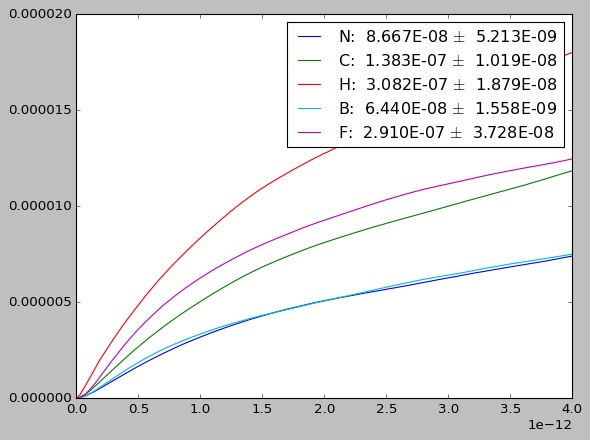

In [4]:
bmim_bf4.run_computation.EinsteinDiffusionCoefficients(plot=True, data_range=40000, correlation_time=1000)

### Compute the Radial Distribution Functions

2021-04-14 18:20:04,824 - mdsuite.calculators.radial_distribution_function (INFO) - Starting RDF Calculation


100%|███████████████████████████████████| 7/7 [00:44<00:00,  6.39s/it]


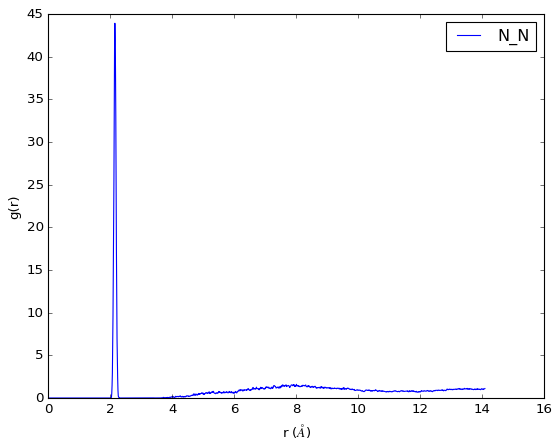

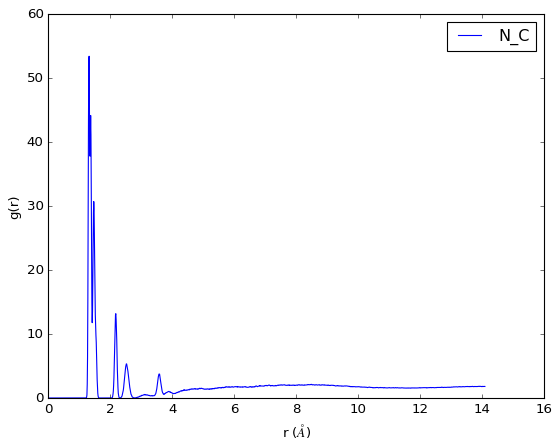

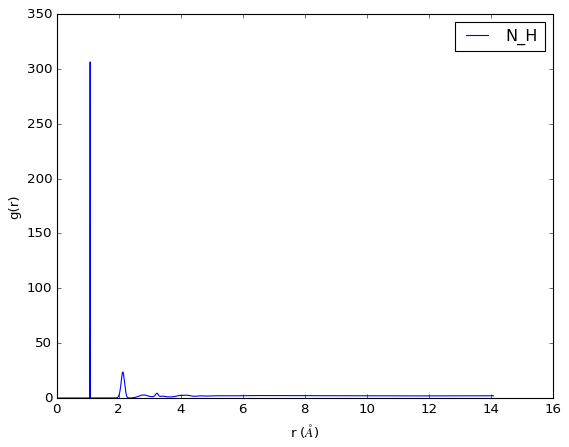

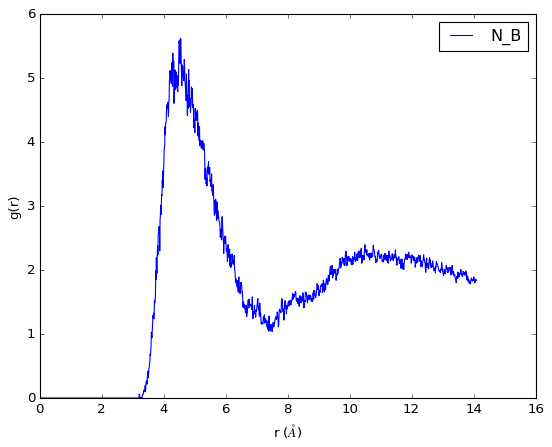

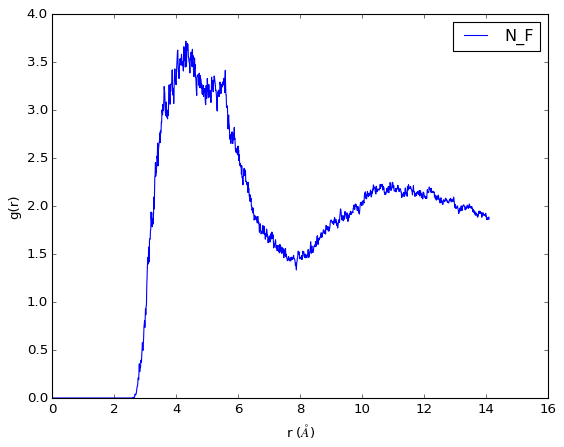

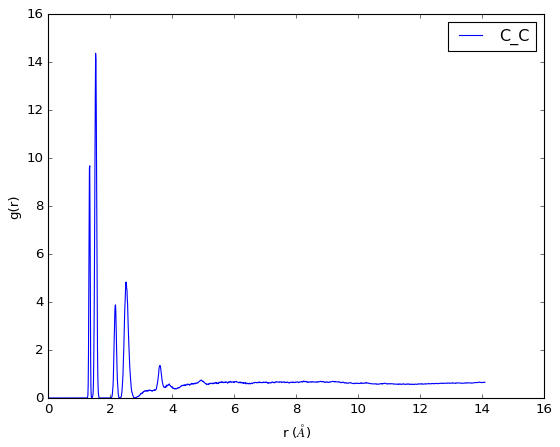

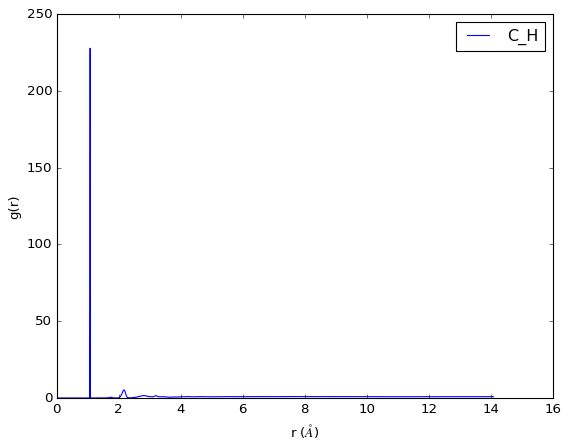

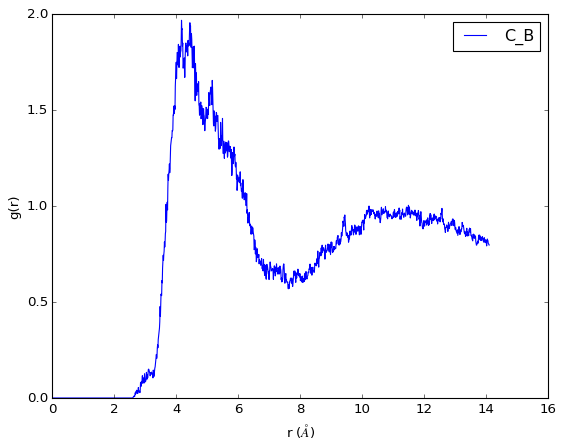

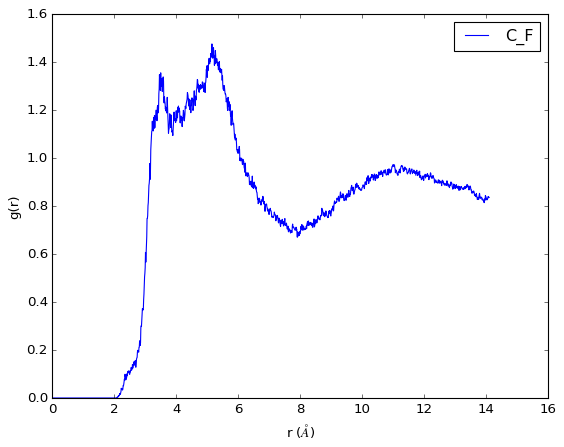

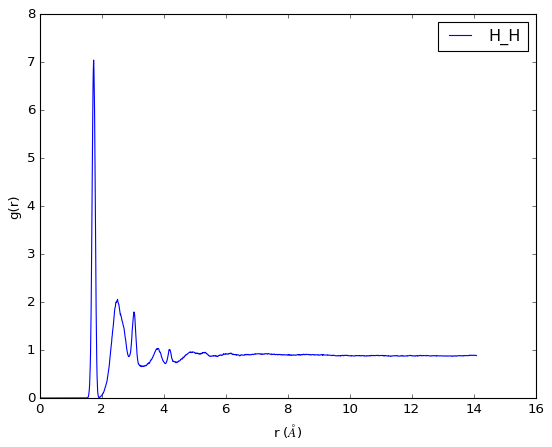

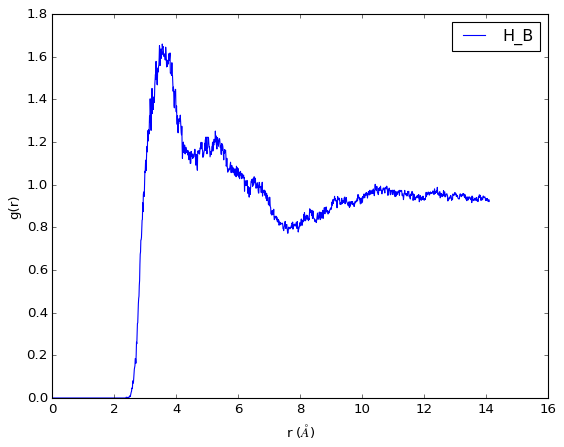

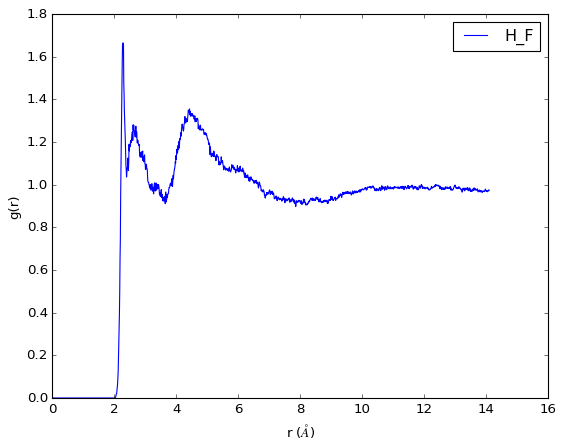

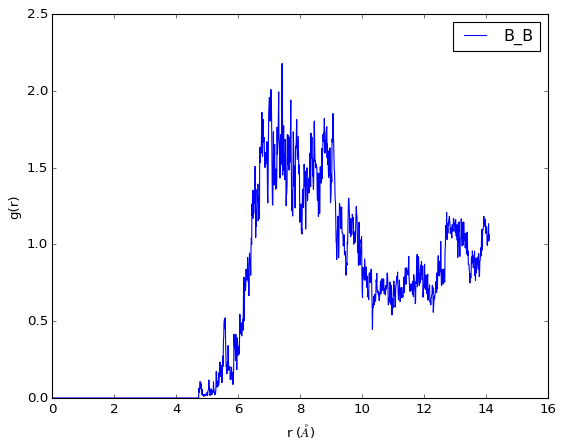

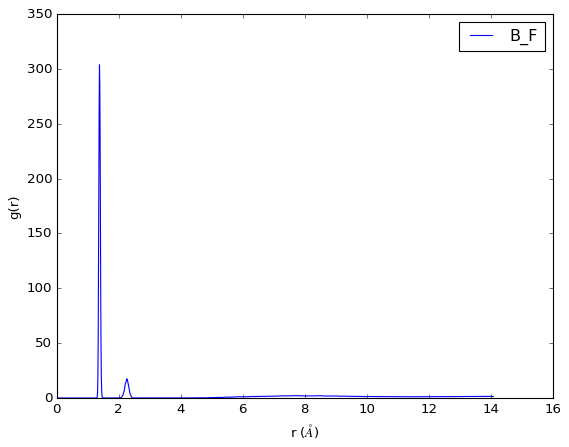

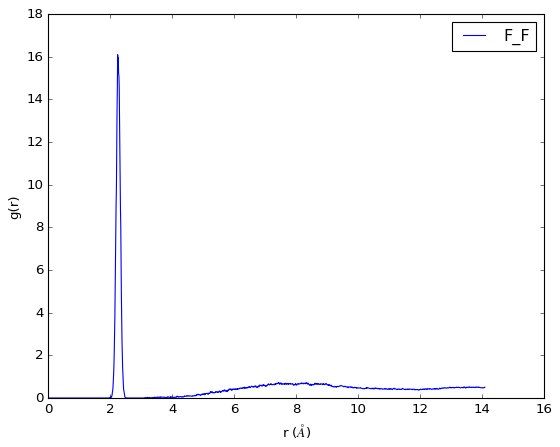

In [5]:
bmim_bf4.run_computation.RadialDistributionFunction(plot=True, number_of_configurations=1000, start=1000, 
                                                    stop=9000, minibatch=200)

### Compute the Angular Distribution Functions

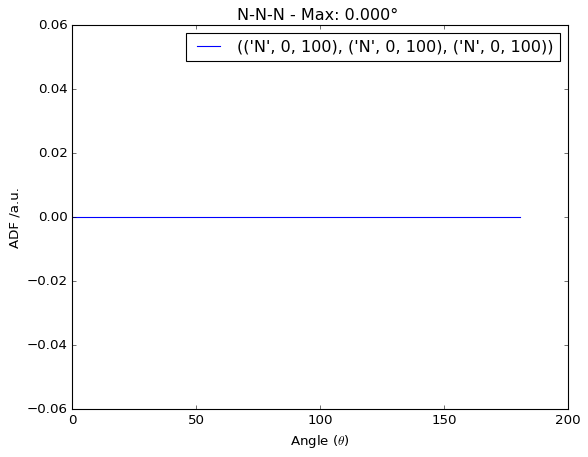

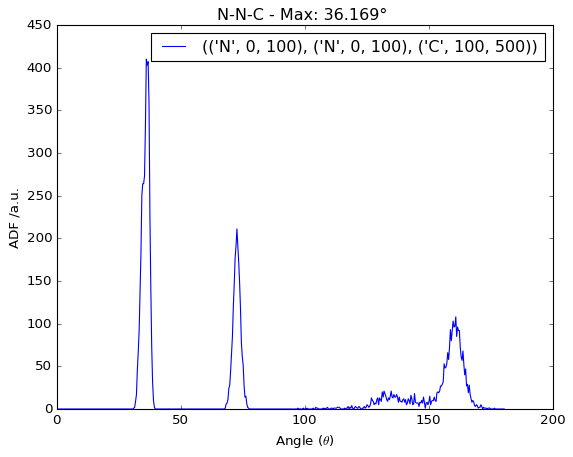

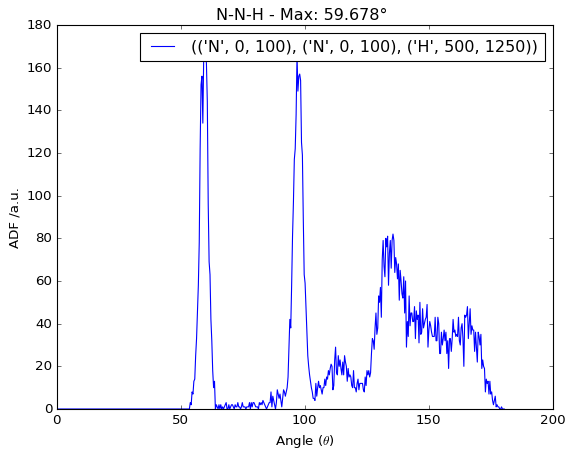

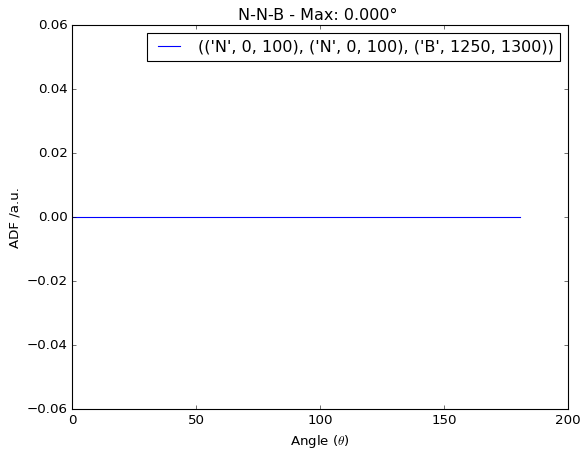

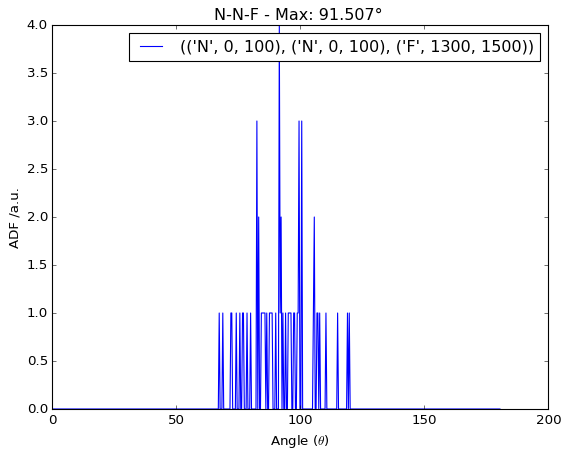

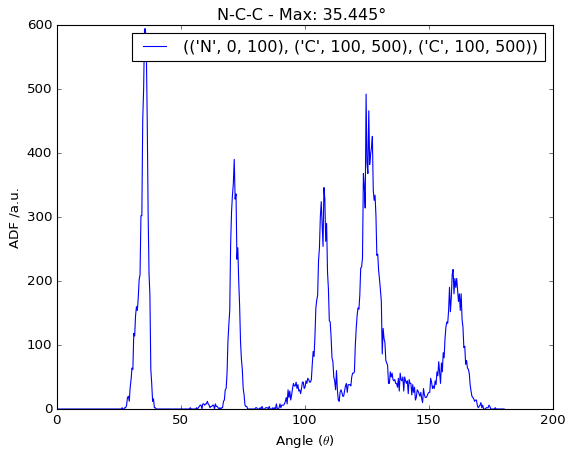

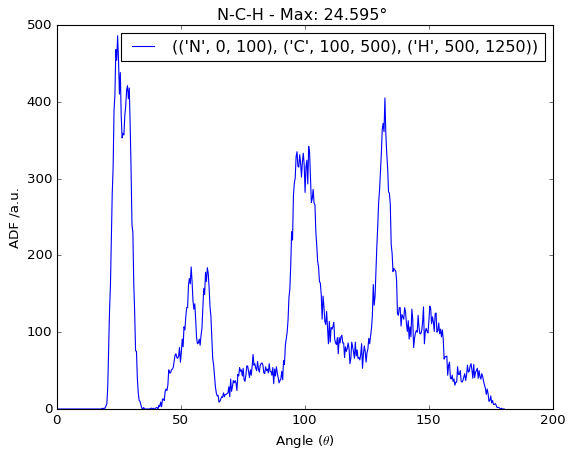

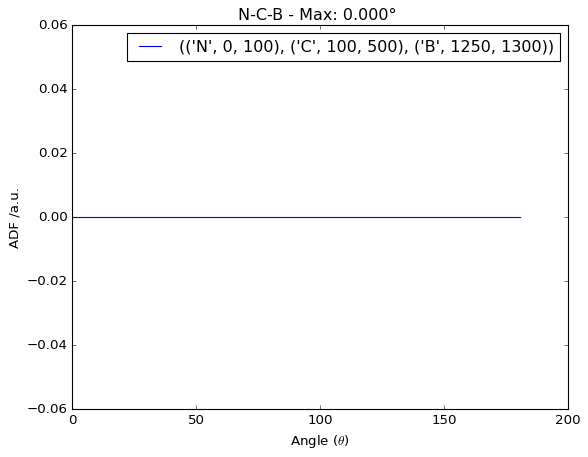

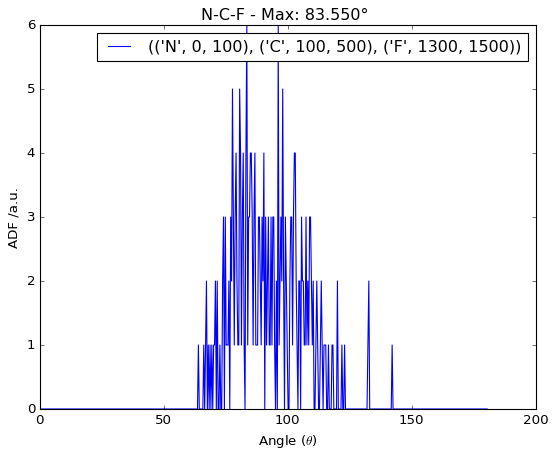

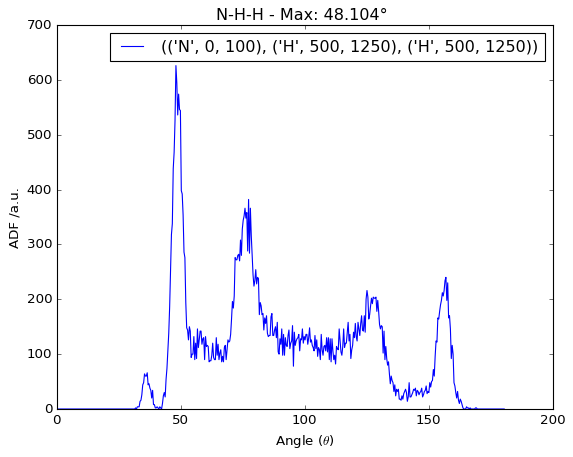

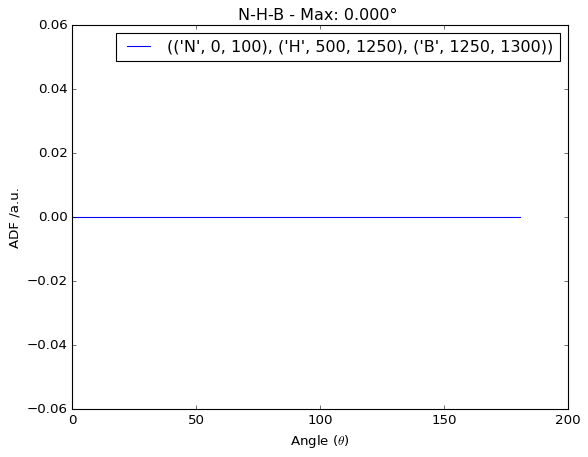

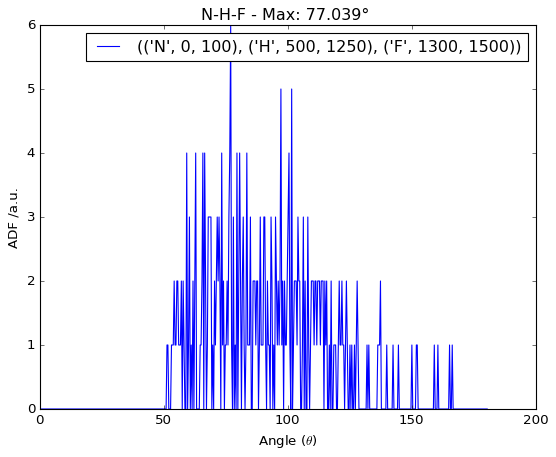

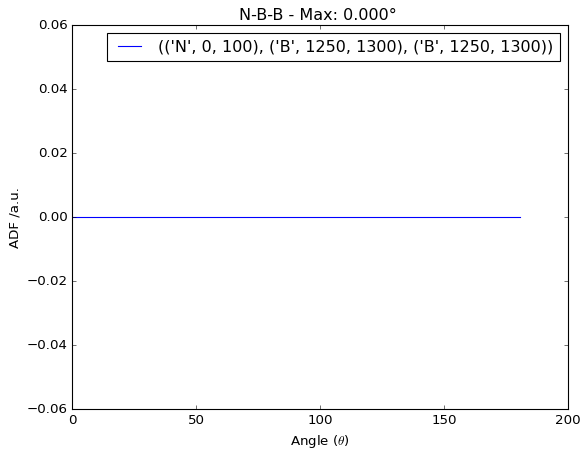

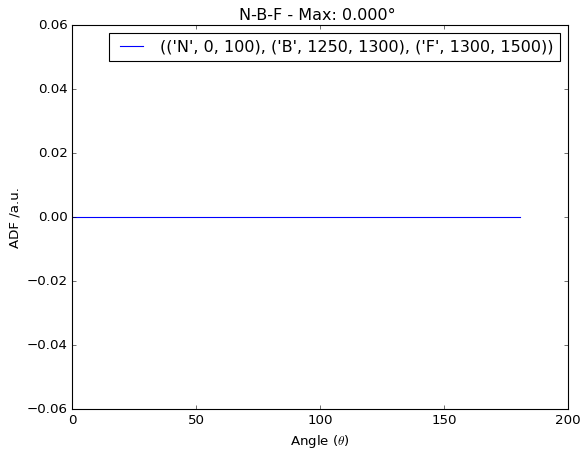

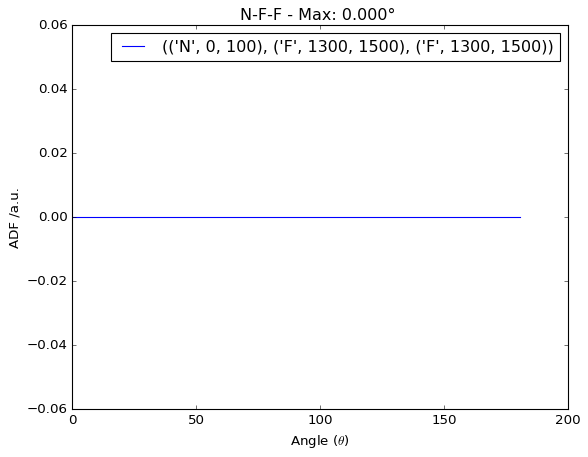

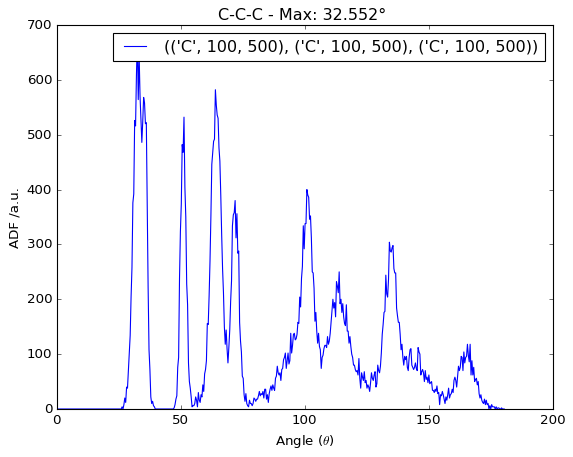

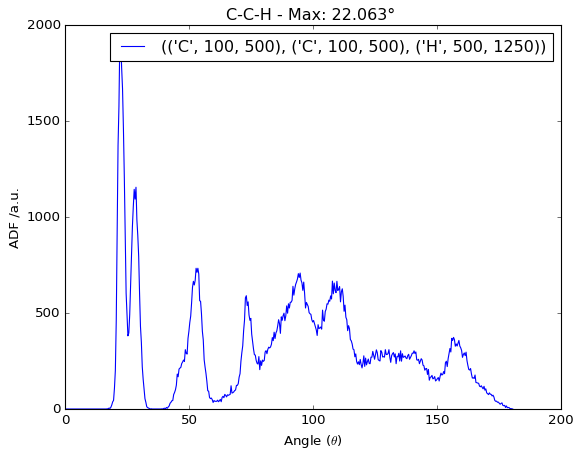

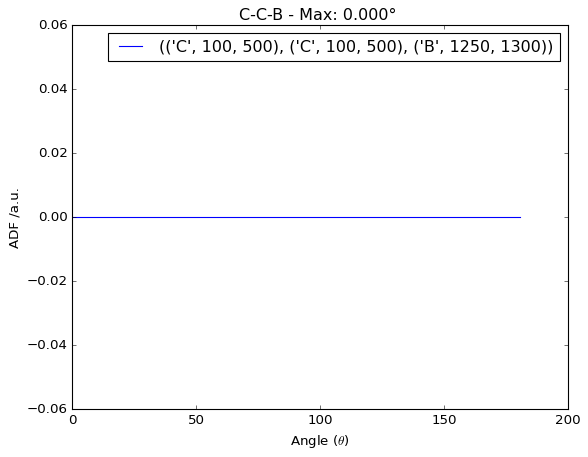

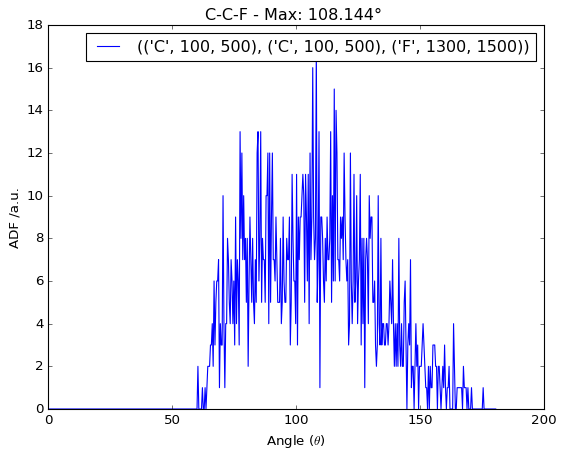

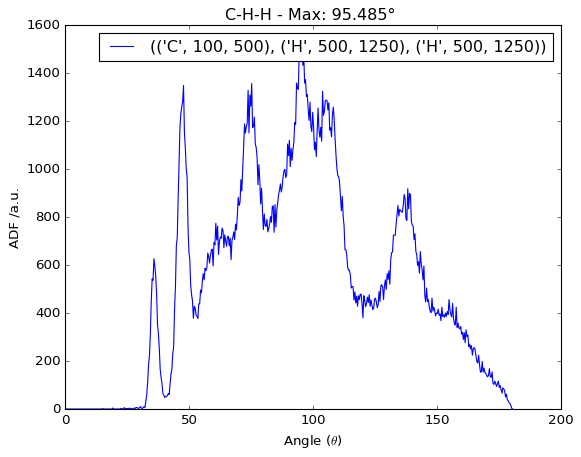

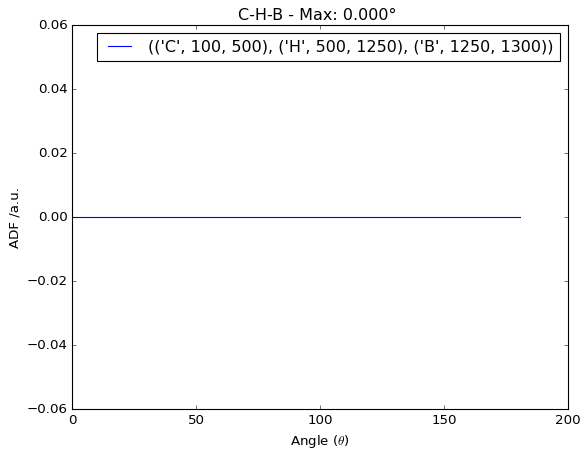

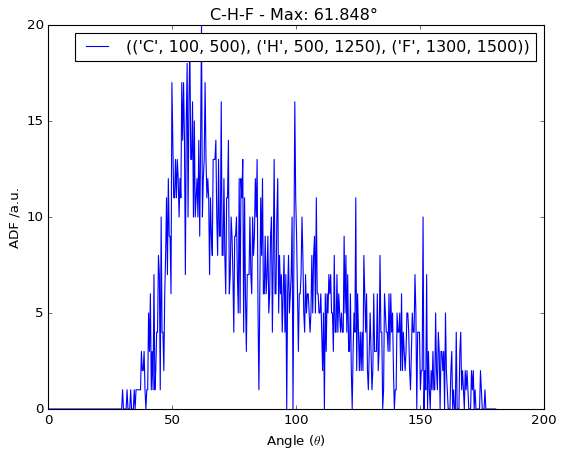

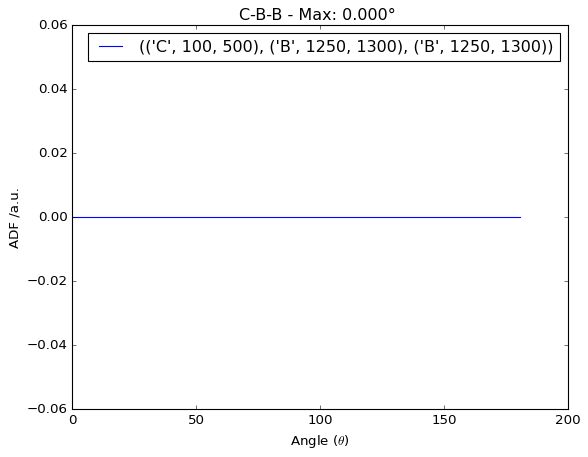

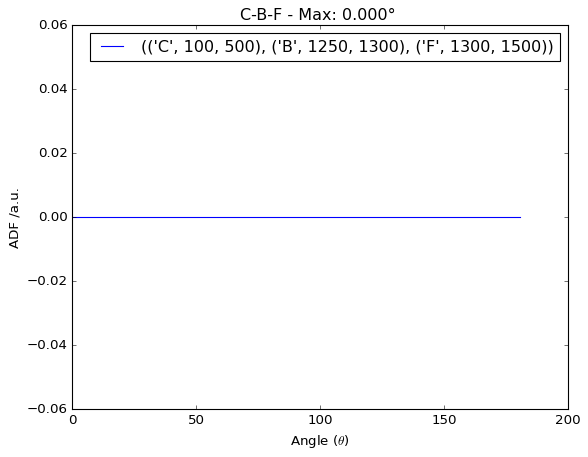

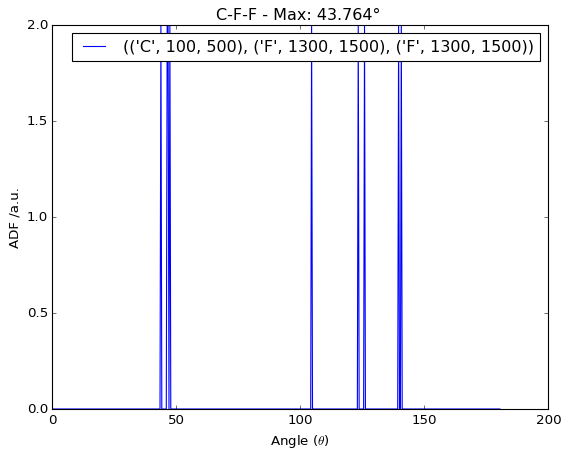

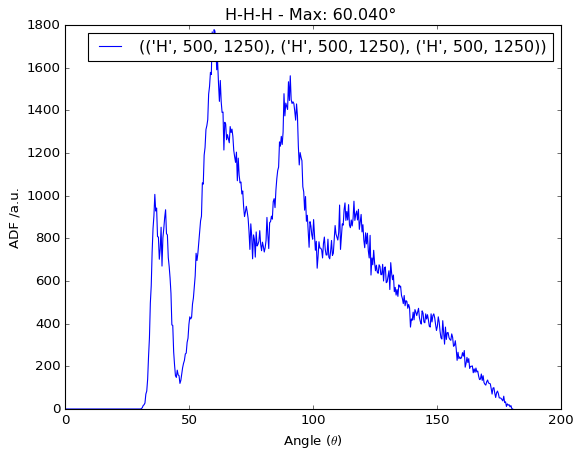

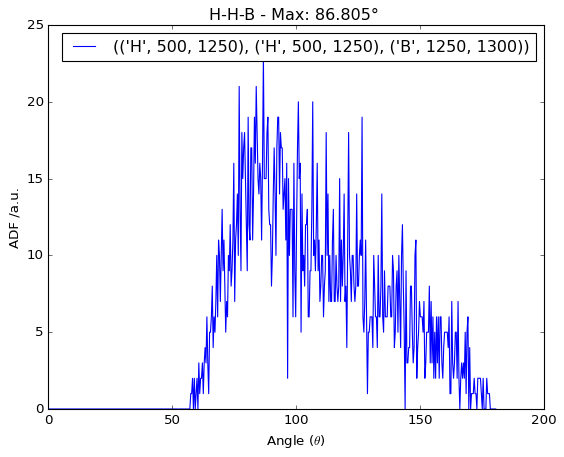

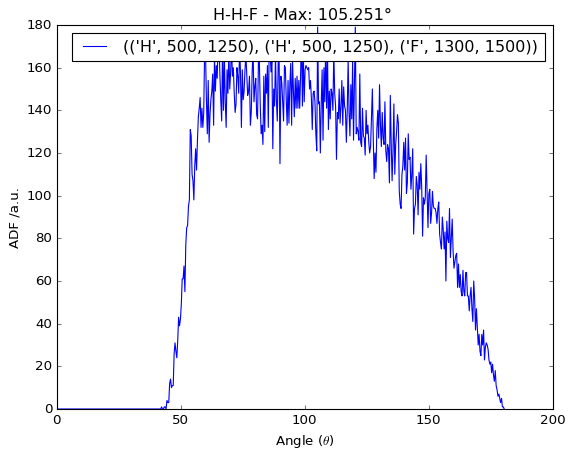

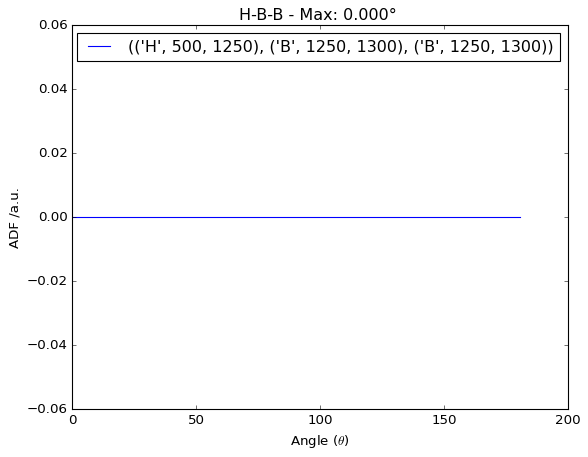

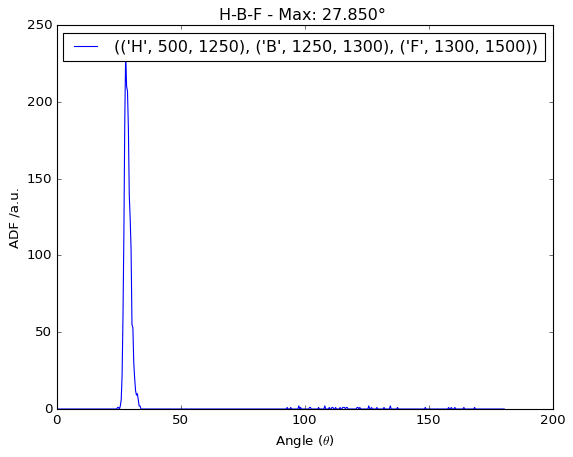

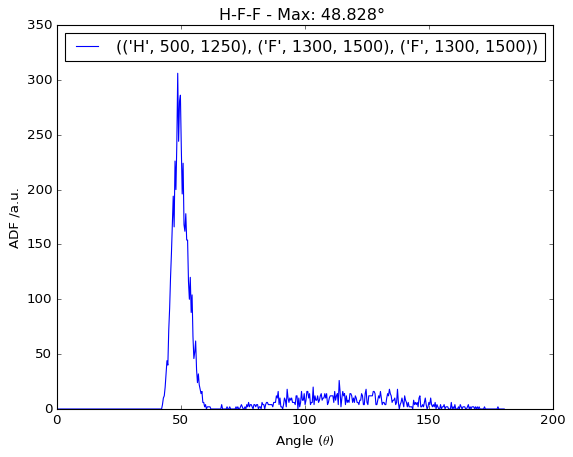

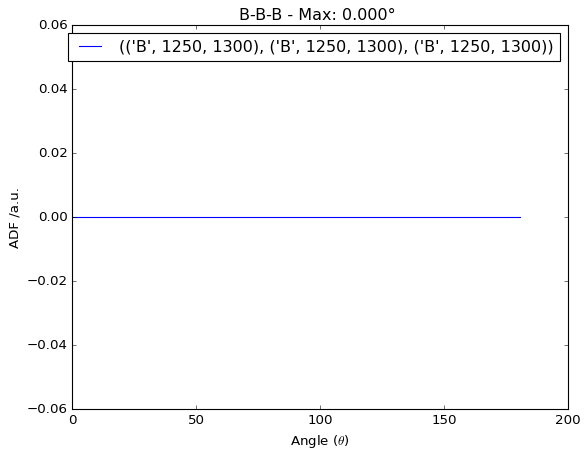

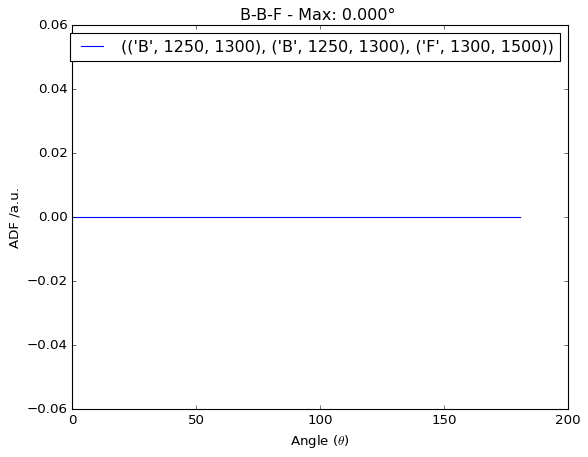

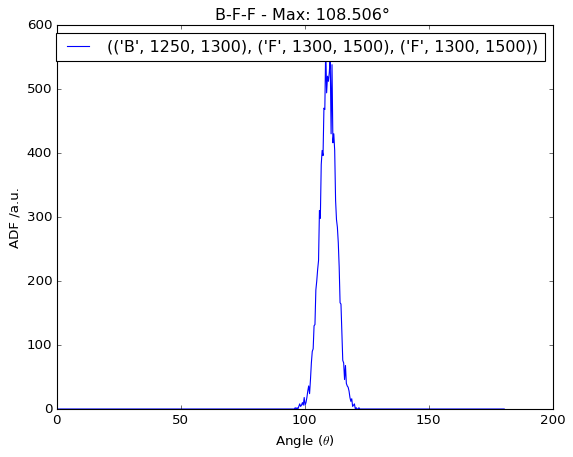

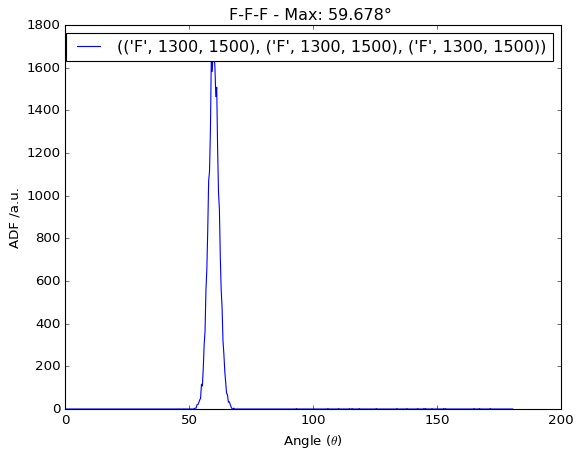

In [6]:
bmim_bf4.run_computation.AngularDistributionFunction(batch_size=10, n_minibatches=100, 
                                                     n_confs=20, r_cut=3.0, use_tf_function=True)

###  Map the atoms into molecule groups

We are preparing a tutorial on exactly how to get these cutoff values correct. In the future we also planning to include an enforced isomorphism with the reference graphs.

In [ ]:
mapper = MolecularMap(bmim_bf4, molecules={'bmim': {'smiles': 'CCCCN1C=C[N+](+C1)C', 'cutoff': 1.9}, 
                                           'bf4': {'smiles': '[B-](F)(F)(F)F', 'cutoff': 2.4}})
mapper.run_transformation()

### Perform RDF and Diffusion analysis on the molecule groups

2021-04-14 18:22:29,825 - mdsuite.calculators.radial_distribution_function (INFO) - Starting RDF Calculation


100%|█████████████████████████████████| 57/57 [00:05<00:00, 11.07it/s]


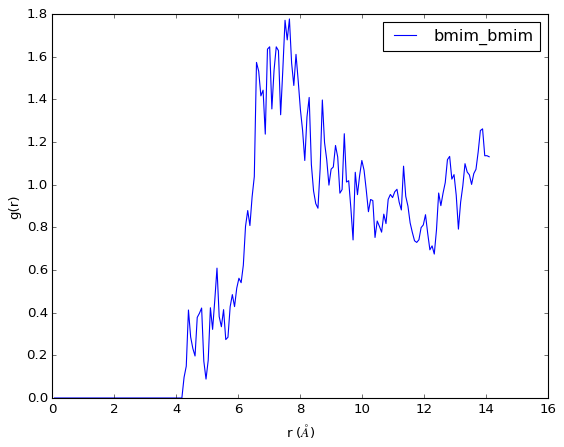

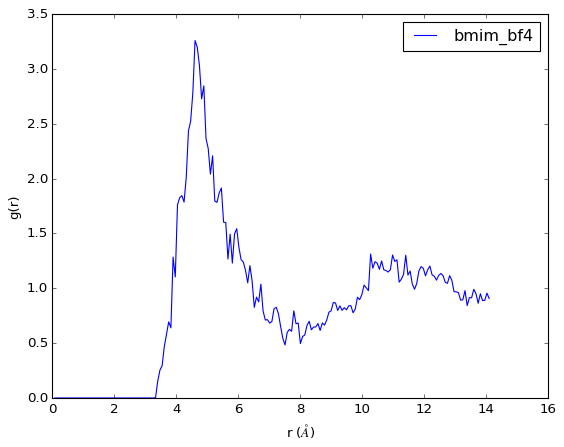

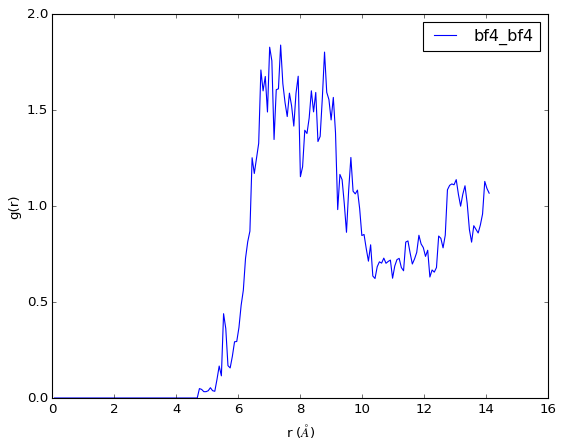

In [8]:
bmim_bf4.run_computation.RadialDistributionFunction(plot=True, number_of_configurations=7000, start=1000, 
                                                    stop=9000, molecules=True, minibatch=150, number_of_bins=200)

2021-04-14 18:22:35,477 - mdsuite.calculators.einstein_diffusion_coefficients (INFO) - starting Einstein Diffusion Computation


bf4: 100%|████████████████████████████| 30/30 [00:02<00:00, 10.90it/s]


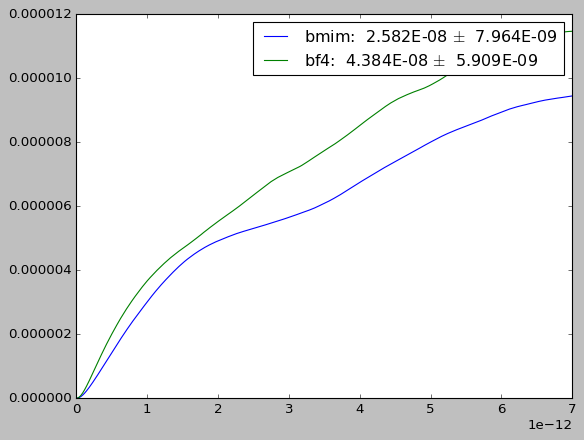

In [9]:
bmim_bf4.run_computation.EinsteinDiffusionCoefficients(plot=True, data_range=70000, correlation_time=1000, molecules=True)